In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

floating_data_path = join(data_dir, 'SeoulFloating.csv')

floating = pd.read_csv(floating_data_path)

In [3]:
print('floating data dim : {}'.format(floating.shape))

floating data dim : (1084800, 7)


In [4]:
print(floating.columns)

Index(['date', 'hour', 'birth_year', 'sex', 'province', 'city', 'fp_num'], dtype='object')


In [5]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [6]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [7]:
floating.tail()

,date,hour,birth_year,sex,province,city,fp_num
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650


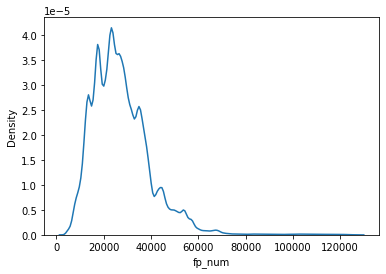

In [8]:
sns.kdeplot(floating['fp_num'])
plt.show()

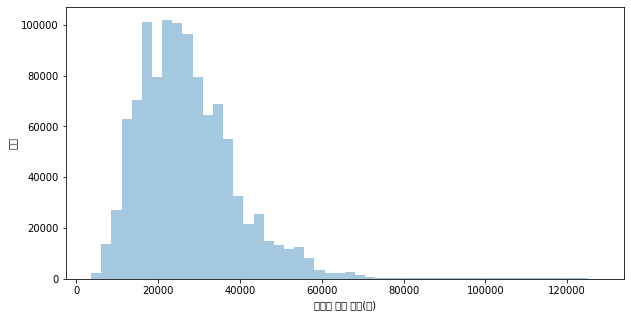

In [9]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(floating['fp_num'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

# 정부 정책에 따른 확진자수 변화 

In [10]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

policy_data_path = join(data_dir, 'Policy.csv')

policy = pd.read_csv(policy_data_path)

In [11]:
policy.tail()

,policy_id,country,type,gov_policy,detail,start_date,end_date
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14


In [12]:
patient_data_path = join(data_dir, 'PatientInfo.csv')

patient = pd.read_csv(patient_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(patient.shape)

(5165, 14)


In [13]:
patient.tail()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [14]:
# patient_null = patient['patient_id'].dropna()
# print(patient_null.shape)
# patient.tail()

In [15]:
#x축
from datetime import datetime
duration = patient["confirmed_date"].unique()
# duration = pd.to_datetime(duration)

duration= duration[:-1]
duration = pd.to_datetime(duration).sort_values()
print(duration)
type(duration)
# duration=duration.loc[datetime(2020, 1, 23):datetime(2020, 6, 30)]

DatetimeIndex(['2020-01-20', '2020-01-23', '2020-01-26', '2020-01-27',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-05',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=148, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
#y축
# patient.groupby(patient['confirmed_date']).count() 
confirmed_case = patient["confirmed_date"].value_counts()
print(confirmed_case.shape)

(148,)


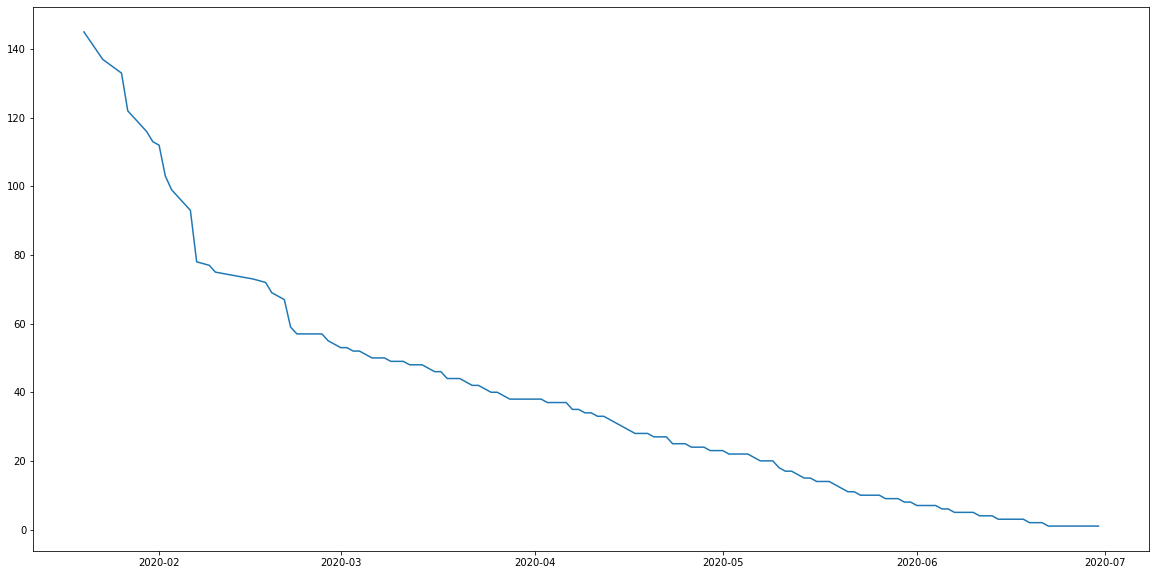

In [17]:
plt.figure(figsize=(20,10)) 
plt.plot(duration,confirmed_case)
plt.show()

확진자 감소 추이가 

In [18]:
search_data_path = join(data_dir, 'SearchTrend.csv')

search = pd.read_csv(search_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(search.shape)

(1642, 5)


In [19]:
search.columns

Index(['date', 'cold', 'flu', 'pneumonia', 'coronavirus'], dtype='object')

In [20]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [21]:
search["date"] = pd.to_datetime(search["date"])

In [22]:
cov = search[(search['date']>='2020-01-01') & (search['date']<='2020-05-31')]
cov.head()

,date,cold,flu,pneumonia,coronavirus
1461,2020-01-01,0.14454,0.48434,0.44880,0.01699
1462,2020-01-02,0.19508,0.85751,0.36471,0.01827
1463,2020-01-03,0.19581,0.80443,0.46598,0.02845
1464,2020-01-04,0.60343,0.86961,0.49571,0.02136
1465,2020-01-05,0.20081,0.84152,0.41644,0.01927


In [23]:
cov = cov.set_index('date')

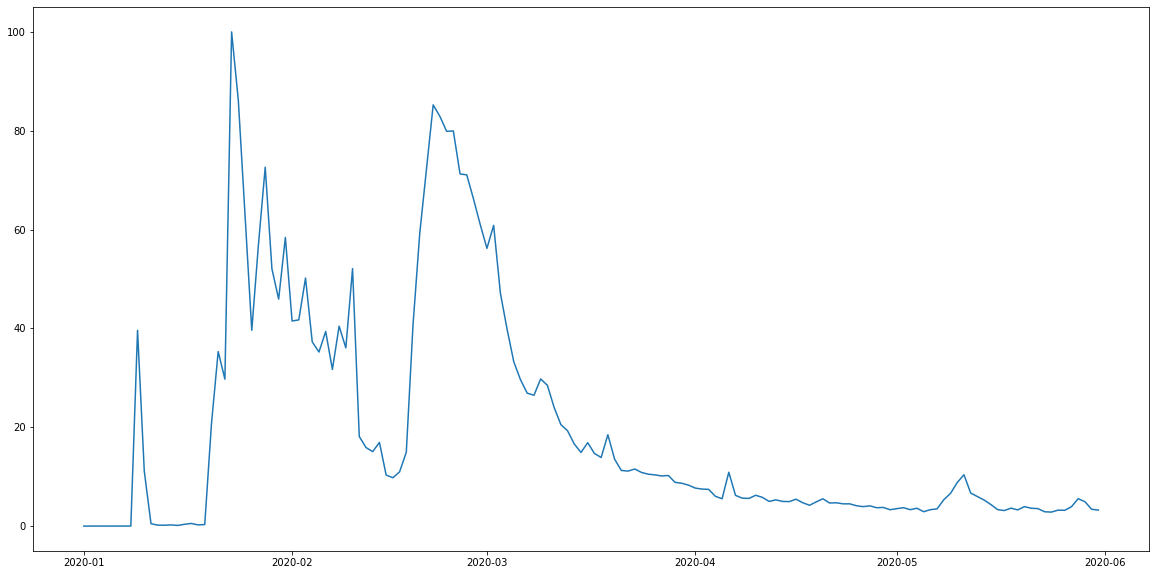

In [24]:
cov = cov["coronavirus"]
plt.figure(figsize=(20,10)) 
plt.plot(cov)
plt.show()

In [25]:
floating2 = pd.read_csv(floating_data_path)

# 일자별 이동량 합산

In [26]:
fl = floating2.groupby(by = 'date').fp_num.agg('sum')
fl

date
2020-01-01    192406170
2020-01-02    202929360
2020-01-03    203337150
2020-01-04    197396050
2020-01-05    195747670
                ...    
2020-05-27    199293080
2020-05-28    199209840
2020-05-29    140847320
2020-05-30    189674150
2020-05-31    188346500
Name: fp_num, Length: 151, dtype: int64

In [27]:
# a = fl.max()
# index = fl.index(a)
# index
fl[fl == fl.max()].index[0]

'2020-02-23'

In [28]:
floating2[floating2["date"] =='2020-02-23'] 

,date,hour,birth_year,sex,province,city,fp_num
381600,2020-02-23,0,20,female,Seoul,Dobong-gu,38930
381601,2020-02-23,0,20,male,Seoul,Dobong-gu,39140
381602,2020-02-23,0,20,female,Seoul,Dongdaemun-gu,55030
381603,2020-02-23,0,20,male,Seoul,Dongdaemun-gu,59200
381604,2020-02-23,0,20,female,Seoul,Dongjag-gu,62770
...,...,...,...,...,...,...,...
388795,2020-02-23,23,70,male,Seoul,Yangcheon-gu,23960
388796,2020-02-23,23,70,female,Seoul,Yeongdeungpo-gu,35230
388797,2020-02-23,23,70,male,Seoul,Yeongdeungpo-gu,26130
388798,2020-02-23,23,70,female,Seoul,Yongsan-gu,25000


In [29]:
fl[fl == fl.min()].index[0]

'2020-05-29'

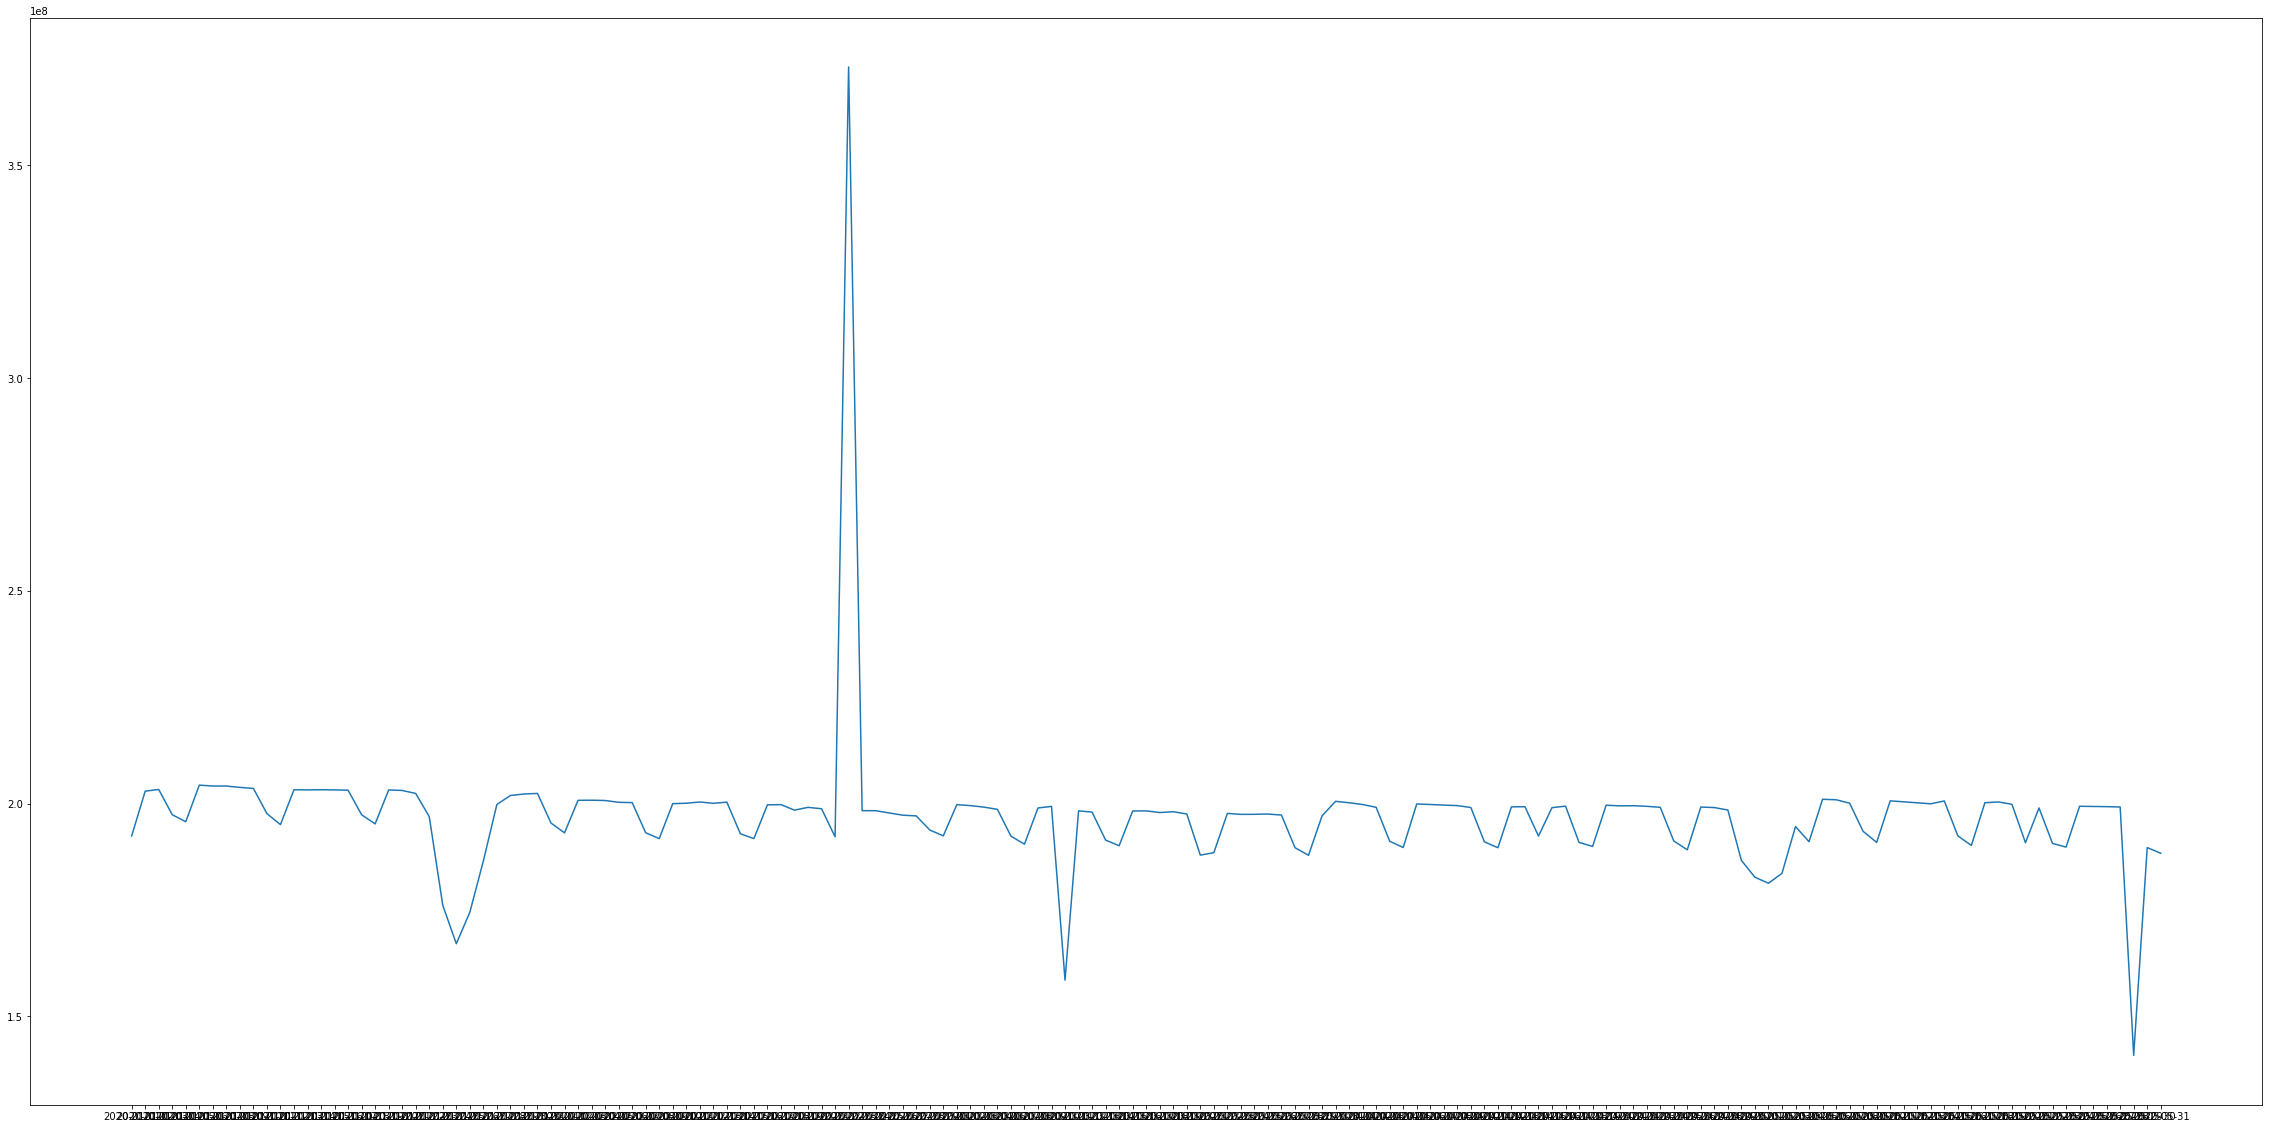

In [30]:
plt.figure(figsize=(40,20)) 
plt.plot(fl)
plt.show()

# 연령대별 이동량 계산

In [31]:
from datetime import datetime

# floating2.date = pd.to_datetime(floating2["date"])
# floating2 = floating2.set_index('date')
floating2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [35]:
birth = floating2.groupby(by = 'birth_year').fp_num.agg('sum')
birth.head()

birth_year
20    5441769700
30    6069018790
40    6054699830
50    5675739830
60    3706127050
Name: fp_num, dtype: int64

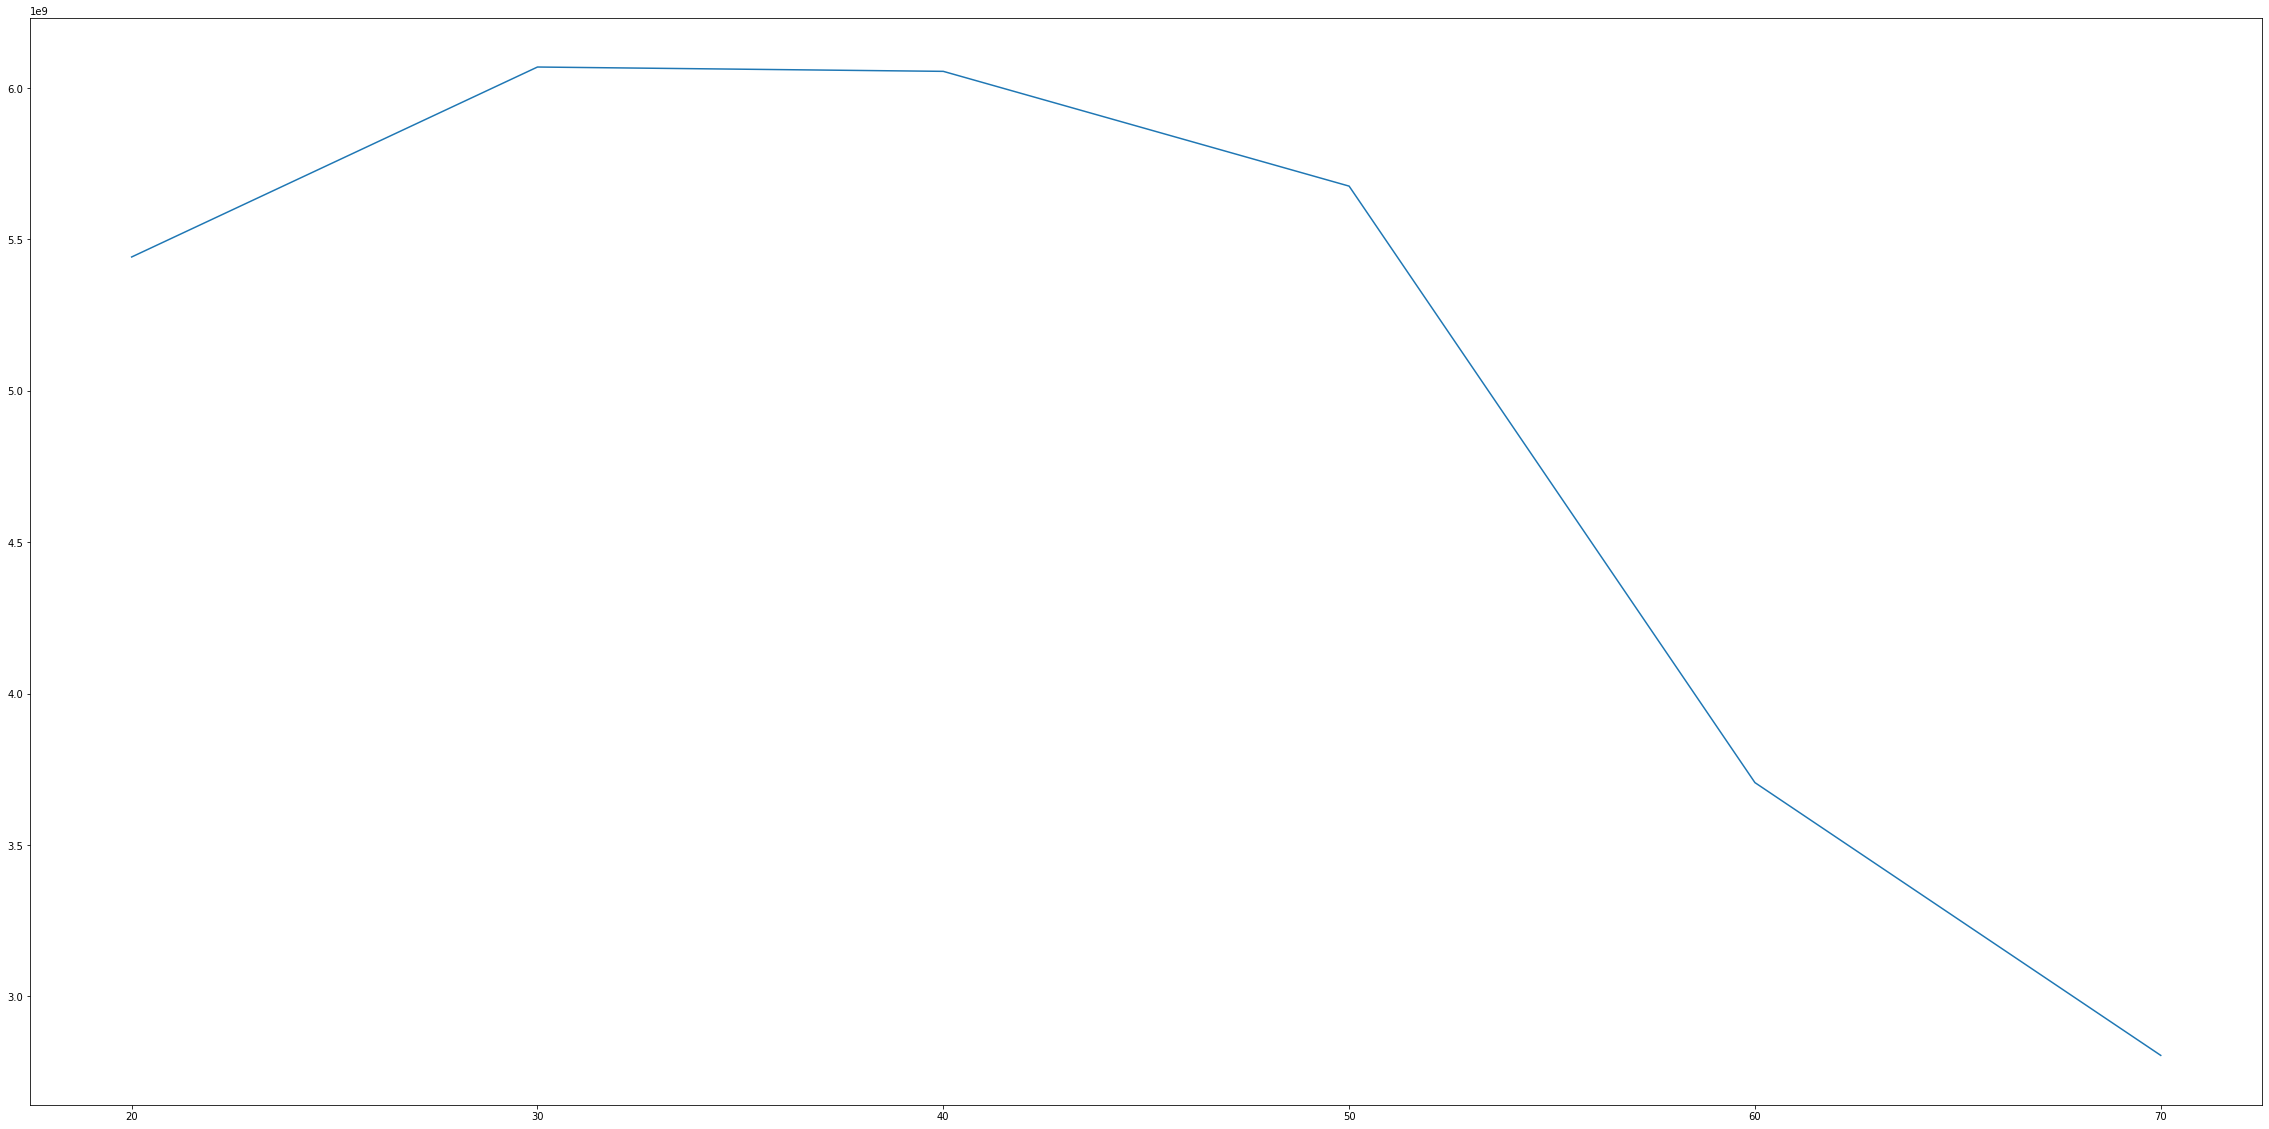

In [36]:
plt.figure(figsize=(40,20)) 
plt.plot(birth)
plt.show()

경제활동이 활발한 30-40대의 이동량이 많은 것을 볼 수 있다.

In [77]:
twn = floating2[floating2["birth_year"] == 20]
twn.head()
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        180800 non-null  object
 1   hour        180800 non-null  int64 
 2   birth_year  180800 non-null  int64 
 3   sex         180800 non-null  object
 4   province    180800 non-null  object
 5   city        180800 non-null  object
 6   fp_num      180800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.0+ MB


In [78]:
twn["date"] = pd.to_datetime(twn["date"])
twn = pd.DataFrame(twn)
# twn = twn.groupby(by = 'date').agg((fp_num='sum'))
type(twn)
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        180800 non-null  datetime64[ns]
 1   hour        180800 non-null  int64         
 2   birth_year  180800 non-null  int64         
 3   sex         180800 non-null  object        
 4   province    180800 non-null  object        
 5   city        180800 non-null  object        
 6   fp_num      180800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 11.0+ MB


### 각 연령대별 일자-시간별 이동량 합계

In [82]:
twn_sum = twn.groupby(['date','hour']).agg({"fp_num" : sum})
twn_sum

fp_num
date       hour         
2020-01-01 0     1448180
           1     1433590
           2     1424810
           3     1416150
           4     1411090
...                  ...
2020-05-31 19    1498700
           20    1496200
           21    1488870
           22    1478950
           23    1468280

[3616 rows x 1 columns]

In [86]:
thr = floating2[floating2["birth_year"] == 30]
thr.head()

,date,hour,birth_year,sex,province,city,fp_num
1200,2020-01-01,0,30,female,Seoul,Dobong-gu,21950
1201,2020-01-01,0,30,male,Seoul,Dobong-gu,22230
1202,2020-01-01,0,30,female,Seoul,Dongdaemun-gu,26060
1203,2020-01-01,0,30,male,Seoul,Dongdaemun-gu,28910
1204,2020-01-01,0,30,female,Seoul,Dongjag-gu,31610


In [87]:
thr["date"] = pd.to_datetime(thr["date"])
thr = pd.DataFrame(thr)
thr_sum = thr.groupby(['date','hour']).agg({"fp_num" : sum})
thr_sum

fp_num
date       hour         
2020-01-01 0     1583570
           1     1571090
           2     1562770
           3     1556670
           4     1551960
...                  ...
2020-05-31 19    1617240
           20    1624790
           21    1629130
           22    1630060
           23    1628230

[3616 rows x 1 columns]

In [88]:
four = floating2[floating2["birth_year"] == 40]
four.head()

,date,hour,birth_year,sex,province,city,fp_num
2400,2020-01-01,0,40,female,Seoul,Dobong-gu,26730
2401,2020-01-01,0,40,male,Seoul,Dobong-gu,25740
2402,2020-01-01,0,40,female,Seoul,Dongdaemun-gu,26950
2403,2020-01-01,0,40,male,Seoul,Dongdaemun-gu,28520
2404,2020-01-01,0,40,female,Seoul,Dongjag-gu,29740


In [89]:
four["date"] = pd.to_datetime(four["date"])
four = pd.DataFrame(four)
four_sum = four.groupby(['date','hour']).agg({"fp_num" : sum})
four_sum

fp_num
date       hour         
2020-01-01 0     1613790
           1     1601360
           2     1594570
           3     1589580
           4     1584650
...                  ...
2020-05-31 19    1609070
           20    1618750
           21    1627340
           22    1632320
           23    1633650

[3616 rows x 1 columns]

In [90]:
fth = floating2[floating2["birth_year"] == 50]
fth.head()

,date,hour,birth_year,sex,province,city,fp_num
3600,2020-01-01,0,50,female,Seoul,Dobong-gu,29070
3601,2020-01-01,0,50,male,Seoul,Dobong-gu,26340
3602,2020-01-01,0,50,female,Seoul,Dongdaemun-gu,27960
3603,2020-01-01,0,50,male,Seoul,Dongdaemun-gu,27060
3604,2020-01-01,0,50,female,Seoul,Dongjag-gu,30860


In [91]:
fth["date"] = pd.to_datetime(fth["date"])
fth = pd.DataFrame(fth)
fth_sum = fth.groupby(['date','hour']).agg({"fp_num" : sum})
fth_sum

fp_num
date       hour         
2020-01-01 0     1549250
           1     1539210
           2     1532890
           3     1527880
           4     1522580
...                  ...
2020-05-31 19    1531480
           20    1545400
           21    1556600
           22    1561780
           23    1562500

[3616 rows x 1 columns]

In [93]:
sth = floating2[floating2["birth_year"] == 60]
sth.head()

,date,hour,birth_year,sex,province,city,fp_num
4800,2020-01-01,0,60,female,Seoul,Dobong-gu,20550
4801,2020-01-01,0,60,male,Seoul,Dobong-gu,19080
4802,2020-01-01,0,60,female,Seoul,Dongdaemun-gu,21880
4803,2020-01-01,0,60,male,Seoul,Dongdaemun-gu,19820
4804,2020-01-01,0,60,female,Seoul,Dongjag-gu,23650


In [94]:
sth["date"] = pd.to_datetime(sth["date"])
sth = pd.DataFrame(sth)
sth_sum = sth.groupby(['date','hour']).agg({"fp_num" : sum})
sth_sum

fp_num
date       hour         
2020-01-01 0     1095570
           1     1087780
           2     1083490
           3     1079270
           4     1075200
...                  ...
2020-05-31 19     990880
           20     999050
           21    1004880
           22    1007730
           23    1007930

[3616 rows x 1 columns]

In [92]:
svt = floating2[floating2["birth_year"] == 70]
svt.head()

,date,hour,birth_year,sex,province,city,fp_num
6000,2020-01-01,0,70,female,Seoul,Dobong-gu,18690
6001,2020-01-01,0,70,male,Seoul,Dobong-gu,13860
6002,2020-01-01,0,70,female,Seoul,Dongdaemun-gu,20180
6003,2020-01-01,0,70,male,Seoul,Dongdaemun-gu,15020
6004,2020-01-01,0,70,female,Seoul,Dongjag-gu,20290


In [95]:
svt["date"] = pd.to_datetime(svt["date"])
svt = pd.DataFrame(svt)
svt_sum = svt.groupby(['date','hour']).agg({"fp_num" : sum})
svt_sum

fp_num
date       hour        
2020-01-01 0     841100
           1     834980
           2     831620
           3     827660
           4     824320
...                 ...
2020-05-31 19    748830
           20    750760
           21    751840
           22    752350
           23    752140

[3616 rows x 1 columns]